<IPython.core.display.Javascript object>


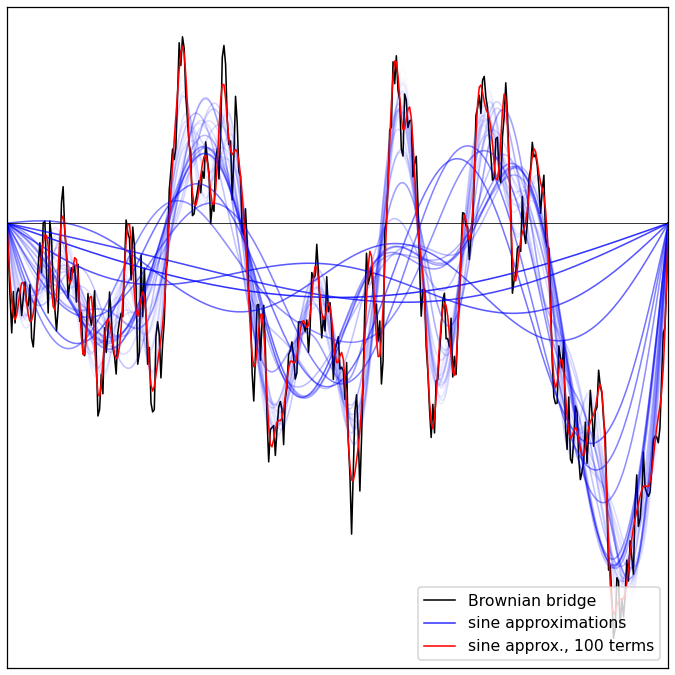

In [2]:
# code from (below) and edited by Trent Rabe
# https://almostsuremath.com/2021/03/31/brownian-bridge-fourier-expansions/
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

# compute Brownian bridge and sine series
nt = 400 # nummber of x coordinates
nsines = 100 # number of sine aproximations (the blue lines)
np.random.seed() # use seed 6 in order to obtain the graph from the site
times = np.linspace(0.0, 1.0, nt)
nrands = nt + nsines
cov = np.zeros(shape=(nrands, nrands)) # initializes a covariance matrix w all zeros

for i, t in enumerate(times):
    cov[i, :i+1] = cov[:i+1, i] = times[:i+1] * (1-t) # calculates the covariance matrix vals and appends them

for i in range(nsines):
    cov[nt + i, nt + i] = c = 2 / (np.pi * (i+1))**2 # updates the diagonal of the covariance matrix
    cov[nt + i, :nt] = cov[:nt, nt+i] = np.sin(times * np.pi * (i+1)) * c

rands = np.random.multivariate_normal(np.zeros(shape=(nrands,)), cov)
series = np.cumsum([np.sin(times * np.pi * (i+1)) * rands[nt + i] for i in range(nsines)], axis=0)

# plot results
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(111)
ax.plot(times, rands[0:nt], label='Brownian bridge', linewidth=1, color='black')
for i in range(39):
    alpha = 0.8 * np.exp(-i * 0.1)
    label = 'sine approximations' if i == 0 else None
    ax.plot(times, series[i], label=label, linewidth=1, color='blue', alpha=alpha)
ax.plot(times, series[-1], label='sine approx., {} terms'.format(nsines), linewidth=1, color='red')
ax.plot([0, 1], [0, 0], linewidth=0.5, color='black')
ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks([])
plt.subplots_adjust(left=0.01, right=0.99, bottom=0.01, top=0.99, hspace=0, wspace=0)
ax.legend(loc='lower right')
plt.show()